In [2]:
'''
Hyper-Parameters
'''
image_H = 96
image_W = 96
grayscale = True
batch_size = 16
learning_rate=0.001
momentum = 0
decay = 0
epochs = 100
droupout= 0.1
gradient_clipping = 0.1
nFilters = 128
nlandmarks = nLabels = 68
K=45

In [4]:
def kernel_design():
    #read kernel.txt
    kernel[45][45] = 0
    return kernel
    


In [ ]:
def inteoccular_error():
    return

In [ ]:
def loss_function():
    return

In [64]:
import pts_loader
path = r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\300w_cropped\01_Indoor\indoor_001.pts'
points = pts_loader.load(path)
print(points)

[(193.0, 91.0), (196.459, 119.344), (197.957, 150.614), (207.552, 176.986), (218.486, 202.157), (235.087, 226.842), (253.016, 246.438), (271.662, 263.865), (300.315, 271.435), (325.732, 266.26), (346.361, 248.966), (362.947, 220.651), (374.439, 197.999), (382.375, 179.064), (389.063, 156.371), (394.302, 124.753), (393.518, 92.944), (217.271, 117.87), (233.218, 109.415), (250.097, 114.454), (266.714, 120.09), (280.68, 127.609), (318.937, 123.59), (332.702, 117.155), (349.344, 109.07), (367.077, 103.951), (380.964, 111.236), (301.931, 145.072), (301.589, 161.106), (301.658, 177.57), (301.777, 194.295), (279.717, 197.93), (290.637, 202.841), (302.652, 205.483), (312.441, 202.069), (323.368, 197.061), (234.474, 136.436), (246.184, 132.337), (260.781, 133.589), (274.594, 143.047), (260.422, 144.769), (246.117, 144.737), (326.876, 140.815), (337.901, 130.008), (352.648, 128.376), (365.343, 132.671), (353.771, 140.525), (340.466, 141.419), (266.04, 229.04), (283.292, 221.978), (294.001, 221.1

In [158]:
def scale_pts(img, pts):
    new_img = cv2.resize(img, (96, 96))
    #print(img.shape)
    scale_x = 96.0/img.shape[0]
    scale_y = 96.0/img.shape[1]
    #print(scale_x, scale_y)
    new_points =[]
    for p in pts:
        new_pts = []
        new_pts = (p[0] * scale_y , p[1] * scale_x )
        new_points.append(new_pts)
    #print (pts)
    #print(new_points)
    return new_img, new_points
    

(444, 588, 3)


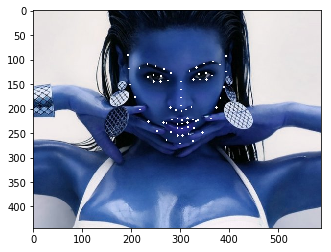

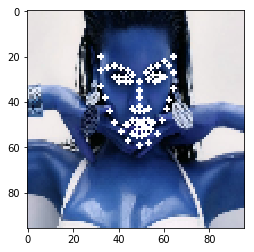

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
path = r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\300w_cropped\01_Indoor\indoor_001.png'
img = cv2.imread(path)
print(img.shape)


new_img, new_points = scale_pts(img, points)

for (x, y) in points:
    cv2.circle(img, (round(x), round(y)),  2, (255,255,255), -1)

for (x, y) in new_points:
    cv2.circle(new_img, (round(x), round(y)),  1, (255,255,255), -1)

plt.imshow(img)
plt.show()

plt.imshow(new_img)
plt.show()


In [123]:
def bilinear_interpolation(x, y):
    print(x, y)
    dx = float(x-int(x))
    dy = float(y-int(y))

    wtl = float((1.0 - dx) * (1.0 - dy))
    wtr = float((dx)       * (1.0 - dy))
    wbl = float((1.0 - dx) * (dy))
    wbr = float((dx)       * (dy))
    print(wtl, wtr, wbl, wbr)

31.51020408163265 19.675675675675677
0.1588527302813017 0.1654715940430211 0.33094318808604756 0.34473248758962965


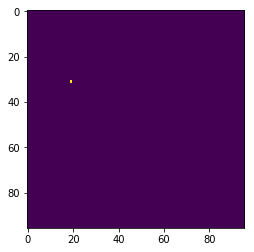

In [190]:
nlandmarks = len(new_points)
#print(nlandmarks)
heatmap = []
i = 0
for p in new_points:
    bilinear_interpolation(p[0], p[1])
    heatmap.append(np.zeros((96, 96, 1), np.uint8))
    
    x = int(p[0])
    y = int(p[1])
    heatmap[i][x][y][0] = 1 # 255 WHite
    
    plt.imshow(heatmap[i].squeeze())
    plt.show()
    i = i+1
    break



In [163]:
import numpy as np
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\Merget\network\config\kernel45.txt')
kernel45 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45 = np.reshape(kernel45, (45, 45))

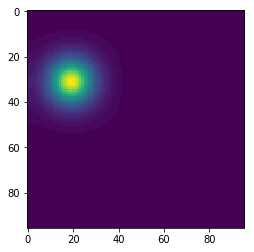

In [198]:
dst = cv2.filter2D(heatmap[0],-1,kernel45)
dst = cv2.filter2D(dst,-1,kernel45)
#dst = cv2.filter2D(dst,-1,kernel45)
#plt.imshow(heatmap[0])
#plt.show()
#blur = cv2.GaussianBlur(heatmap[0], (5,5), 0)
#blur = blur.reshape(96, 96)
#print(blur.shape)
#plt.subplot(122),
plt.imshow(dst)
''',plt.title('Blurred')
plt.xticks([]), plt.yticks([])
'''
plt.show()